In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
missing_values = ["N/a","na",np.nan]

In [151]:
df_final2 = pd.read_csv("/content/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv",na_values = missing_values,thousands=',')

# New Section

In [152]:
df_final2.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,2518.0
1,1901,All Races,Both Sexes,49.1,2473.1
2,1902,All Races,Both Sexes,51.5,2301.3
3,1903,All Races,Both Sexes,50.5,2379.0
4,1904,All Races,Both Sexes,47.6,2502.5


In [153]:
df_final2.isnull().sum()

Year                               0
Race                               0
Sex                                0
Average Life Expectancy (Years)    6
Age-adjusted Death Rate            0
dtype: int64

In [154]:
df_final2=df_final2.drop(['Race','Sex','Average Life Expectancy (Years)'
               ], 
               axis=1)

In [155]:
df_final2.isnull().sum()

Year                       0
Age-adjusted Death Rate    0
dtype: int64

In [156]:
df_final2.dropna(axis=0)

,Year,Age-adjusted Death Rate
0,1900,2518.0
1,1901,2473.1
2,1902,2301.3
3,1903,2379.0
4,1904,2502.5
...,...,...
1066,2014,853.4
1067,2015,861.9
1068,2016,858.9
1069,2017,863.4


In [157]:
df=(df_final2-df_final2.mean())/df_final2.std()

In [158]:
X = np.array(df.iloc[:,:2])
print("X is\n", X)
print(X.shape)

y = np.array(df.iloc[:,1:]).T
y = np.array([y]).T
print("y is\n", y)

X is
 [[-1.71675437  1.35548048]
 [-1.68765684  1.28968034]
 [-1.65855931  1.03791055]
 ...
 [ 1.65855931 -1.0759006 ]
 [ 1.68765684 -1.06930593]
 [ 1.71675437 -1.0844004 ]]
(1071, 2)
y is
 [[[ 1.35548048]]

 [[ 1.28968034]]

 [[ 1.03791055]]

 ...

 [[-1.0759006 ]]

 [[-1.06930593]]

 [[-1.0844004 ]]]


In [159]:
n = len(df)
temp = y
one_hot_labels = np.zeros((n, 3))
for i in range(n):
    one_hot_labels[i, int(y[i])-1] = 1
y = one_hot_labels
print("y after one-hot-encoding is\n",y)

y after one-hot-encoding is
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test label is {y_test.shape}")

Shape of train set is (717, 2)
Shape of test set is (354, 2)
Shape of train label is (717, 3)
Shape of test label is (354, 3)


In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
from tensorflow import keras
NB_CLASSES=3

In [163]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [91]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
model.add(keras.layers.Dense(3,         
                        input_shape=(2,), 
                        name='Hidden-Layer-3', 
                        activation='relu'))    

In [165]:
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer-2',
                             activation='softmax'))



In [166]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-3 (Dense)      (None, 3)                 9         
                                                                 
 Output-Layer-2 (Dense)      (None, 3)                 12        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [168]:
history=model.fit(X_train,
          y_train,
          epochs=4)

Epoch 1/4
23/23 [==============================] - 1s 2ms/step - loss: 1.8320 - accuracy: 0.0530
Epoch 2/4
23/23 [==============================] - 0s 2ms/step - loss: 1.7082 - accuracy: 0.0753
Epoch 3/4
23/23 [==============================] - 0s 2ms/step - loss: 1.5970 - accuracy: 0.1004
Epoch 4/4
23/23 [==============================] - 0s 2ms/step - loss: 1.4989 - accuracy: 0.1339



Accuracy during Training :
------------------------------------


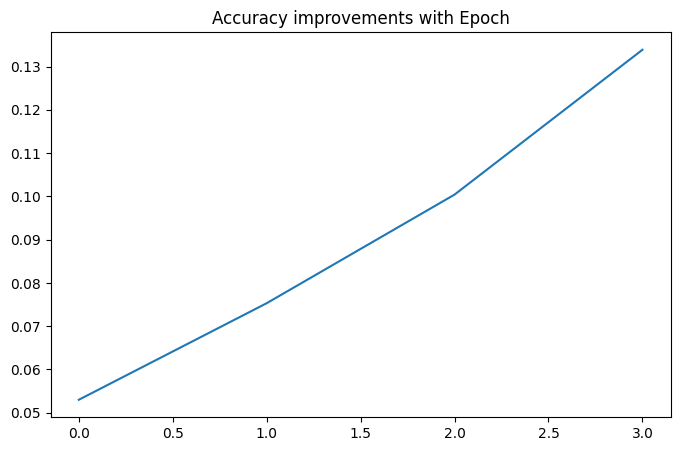

In [169]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [170]:
print("\nEvaluation against Test Dataset :\n")
model.evaluate(X_test,y_test)


Evaluation against Test Dataset :

12/12 [==============================] - 0s 2ms/step - loss: 1.4264 - accuracy: 0.1610


[1.4263759851455688, 0.16101695597171783]

12/12 [==============================] - 0s 3ms/step


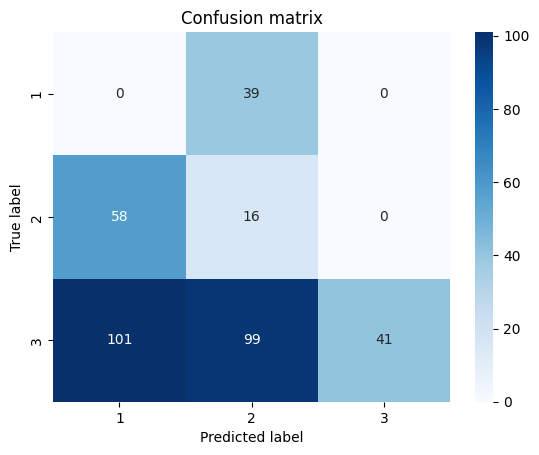

In [171]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()